In [2]:
# ML Assignment1 First Iteration: 
# https://github.com/visualizedata/ml/blob/master/final_assignment_1/toxiccomments_first_full_iteration.ipynb
# Code from Aaron Hill

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

In [23]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    toxic_data = pd.read_csv(fn)
    if (not test):
        # add an indicator for any toxic, severe toxic, obscene, threat, insult, or indentity hate
        toxic_data['any_toxic'] = (toxic_data['toxic'] + toxic_data['severe_toxic'] + toxic_data['obscene'] + toxic_data['threat'] + toxic_data['insult'] + toxic_data['identity_hate'] > 0)
    print("toxic_data is:", type(toxic_data))
    print("toxic_data has", toxic_data.shape[0], "rows and", toxic_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in toxic_data:")
    print(toxic_data.dtypes, "\n")
    print("the first 10 rows in toxic_data:")
    print(toxic_data.head(5))
    if (not test):
        print("The rate of 'toxic' Wikipedia comments in the dataset: ")
        print(toxic_data['any_toxic'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 16, alternate_sign=False)
        X_hv = hv.fit_transform(toxic_data.comment_text)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(toxic_data.comment_text)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    toxic_data['word_count'] = toxic_data['comment_text'].str.split(' ').str.len()
    toxic_data['punc_count'] = toxic_data['comment_text'].str.count("\.")

    X_quant_features = toxic_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = toxic_data['any_toxic']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(toxic_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, toxic_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

In [24]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/yichanwang/Dropbox/2020Fall_Parsons/MachineLearning/Assignment1/toxiccomments_train.csv', my_random_seed=11)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

toxic_data is: <class 'pandas.core.frame.DataFrame'>
toxic_data has 159571 rows and 9 columns 

the data types for each of the columns in toxic_data:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
any_toxic          bool
dtype: object 

the first 10 rows in toxic_data:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  any_toxic  
0             0        0     

In [27]:
# from sklearn import linear_model
# ols = linear_model.SGDClassifier(loss="squared_loss")
# ols.fit(X_train, y_train)

# ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
# ols_performance_train.compute_measures()
# print(ols_performance_train.performance_measures)

{'Pos': 12950, 'Neg': 114706, 'TP': 6764, 'TN': 57620, 'FP': 57086, 'FN': 6186, 'Accuracy': 0.5043554552860814, 'Precision': 0.10593578700078309, 'Recall': 0.5223166023166023, 'desc': 'ols_train'}


In [26]:
# from sklearn import linear_model
# svm = linear_model.SGDClassifier()
# svm.fit(X_train, y_train)

# svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
# svm_performance_train.compute_measures()
# print(svm1_performance_train.performance_measures)

In [29]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train, y_train)

svc_performance_train = BinaryClassificationPerformance(svc.predict(X_train), y_train, 'svc_train')
svc_performance_train.compute_measures()
print(svc_performance_train.performance_measures)

{'Pos': 12950, 'Neg': 114706, 'TP': 12873, 'TN': 114653, 'FP': 53, 'FN': 77, 'Accuracy': 0.9989816381525349, 'Precision': 0.995899736964258, 'Recall': 0.994054054054054, 'desc': 'svc_train'}


In [43]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 12950, 'Neg': 114706, 'TP': 12883, 'TN': 114646, 'FP': 60, 'FN': 67, 'Accuracy': 0.9990051388105534, 'Precision': 0.9953642895773778, 'Recall': 0.9948262548262549, 'desc': 'lgs_train'}


In [30]:
# from sklearn import linear_model
# prc = linear_model.SGDClassifier(loss='perceptron')
# prc.fit(X_train, y_train)

# prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
# prc_performance_train.compute_measures()
# print(prc_performance_train.performance_measures)

{'Pos': 12950, 'Neg': 114706, 'TP': 12836, 'TN': 114608, 'FP': 98, 'FN': 114, 'Accuracy': 0.9983392868333647, 'Precision': 0.9924230709757229, 'Recall': 0.9911969111969112, 'desc': 'prc_train'}


In [19]:
# from sklearn import linear_model
# rdg = linear_model.RidgeClassifier(alpha=100000)
# rdg.fit(X_train, y_train)

# rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
# rdg_performance_train.compute_measures()
# print(rdg_performance_train.performance_measures)

{'Pos': 12950, 'Neg': 114706, 'TP': 8259, 'TN': 114654, 'FP': 52, 'FN': 4691, 'Accuracy': 0.9628454596728708, 'Precision': 0.9937432318613886, 'Recall': 0.6377606177606178, 'desc': 'rdg_train'}


In [8]:
# from sklearn.ensemble import RandomForestClassifier
# rdf = RandomForestClassifier(max_depth=2, random_state=0)
# rdf.fit(X_train, y_train)

# rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
# rdf_performance_train.compute_measures()
# print(rdf_performance_train.performance_measures)

In [35]:
# from sklearn.naive_bayes import MultinomialNB
# nbs = MultinomialNB()
# nbs.fit(X_train, y_train)

# nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
# nbs_performance_train.compute_measures()
# print(nbs_performance_train.performance_measures)

{'Pos': 12950, 'Neg': 114706, 'TP': 12576, 'TN': 102254, 'FP': 12452, 'FN': 374, 'Accuracy': 0.8995268534185624, 'Precision': 0.5024772255074317, 'Recall': 0.9711196911196911, 'desc': 'nbs_train'}


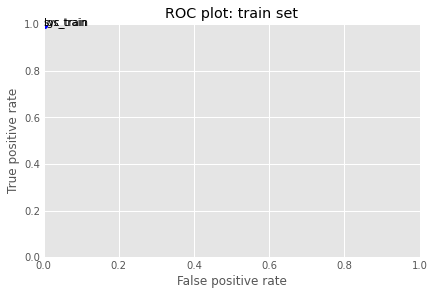

In [38]:
# fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]

# fits = [lgs_performance_train, svc_performance_train]
# plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')

# for fit in fits:
#     plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
#              fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
#     plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
#              fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
# plt.axis([0, 1, 0, 1])
# # plt.title('ROC plot: train set')
# plt.title('ROC plot: train set')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.show()

In [37]:
# ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
# ols_performance_test.compute_measures()
# print(ols_performance_test.performance_measures)

{'Pos': 3275, 'Neg': 28640, 'TP': 1720, 'TN': 14325, 'FP': 14315, 'FN': 1555, 'Accuracy': 0.5027416575278082, 'Precision': 0.1072653570314936, 'Recall': 0.5251908396946565, 'desc': 'ols_test'}


In [38]:
# svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
# svm_performance_test.compute_measures()
# print(svm_performance_test.performance_measures)

{'Pos': 3275, 'Neg': 28640, 'TP': 2067, 'TN': 27258, 'FP': 1382, 'FN': 1208, 'Accuracy': 0.918846937176876, 'Precision': 0.5993041461293128, 'Recall': 0.6311450381679389, 'desc': 'svm_test'}


In [45]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 3275, 'Neg': 28640, 'TP': 2022, 'TN': 27031, 'FP': 1609, 'FN': 1253, 'Accuracy': 0.9103242989190036, 'Precision': 0.5568713852933076, 'Recall': 0.6174045801526717, 'desc': 'lgs_test'}


In [40]:
# nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
# nbs_performance_test.compute_measures()
# print(nbs_performance_test.performance_measures)

{'Pos': 3275, 'Neg': 28640, 'TP': 2424, 'TN': 20826, 'FP': 7814, 'FN': 851, 'Accuracy': 0.728497571674761, 'Precision': 0.2367649931627271, 'Recall': 0.7401526717557252, 'desc': 'nbs_test'}


In [41]:
# prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
# prc_performance_test.compute_measures()
# print(prc_performance_test.performance_measures)

{'Pos': 3275, 'Neg': 28640, 'TP': 2057, 'TN': 27226, 'FP': 1414, 'FN': 1218, 'Accuracy': 0.9175309415635281, 'Precision': 0.5926246038605589, 'Recall': 0.6280916030534351, 'desc': 'prc_test'}


In [26]:
# rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
# rdg_performance_test.compute_measures()
# print(rdg_performance_test.performance_measures)

{'Pos': 3275, 'Neg': 28640, 'TP': 1318, 'TN': 28568, 'FP': 72, 'FN': 1957, 'Accuracy': 0.936424878583738, 'Precision': 0.9482014388489208, 'Recall': 0.4024427480916031, 'desc': 'rdg_test'}


In [32]:
svc_performance_test = BinaryClassificationPerformance(svc.predict(X_test), y_test, 'svc_test')
svc_performance_test.compute_measures()
print(svc_performance_test.performance_measures)

{'Pos': 3275, 'Neg': 28640, 'TP': 2188, 'TN': 26994, 'FP': 1646, 'FN': 1087, 'Accuracy': 0.9143662854457152, 'Precision': 0.5706833594157538, 'Recall': 0.6680916030534351, 'desc': 'svc_test'}


In [43]:
# rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
# rdf_performance_test.compute_measures()
# print(rdf_performance_test.performance_measures)

{'Pos': 3275, 'Neg': 28640, 'TP': 0, 'TN': 28640, 'FP': 0, 'FN': 3275, 'Accuracy': 0.8973836753877487, 'Precision': nan, 'Recall': 0.0, 'desc': 'rdf_test'}


/Users/yichanwang/Dropbox/2020Fall_Parsons/MachineLearning/Assignment1/my_measures.py:25: RuntimeWarning: invalid value encountered in long_scalars
  self.performance_measures['Precision'] = self.performance_measures['TP'] / (self.performance_measures['TP'] + self.performance_measures['FP'])


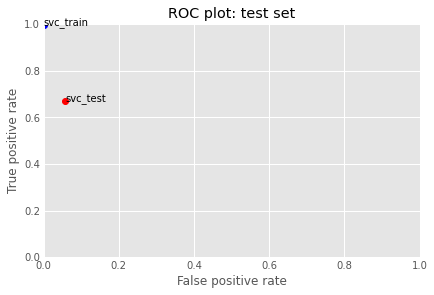

In [40]:
# fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]
# fits = [svc1_performance_test, svc2_performance_test, svc3_performance_test, svc4_performance_test, svc5_performance_test, svc6_performance_test, svc7_performance_test]
trainfits = [svc_performance_train]
testfits = [svc_performance_test]

plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

for fit in trainfits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
    
for fit in testfits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'ro')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
    
plt.axis([0, 1, 0, 1])
# plt.title('ROC plot: test set')
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [41]:
raw_data, X_test_submission = process_raw_data(fn='/Users/yichanwang/Dropbox/2020Fall_Parsons/MachineLearning/Assignment1/toxiccomments_test.csv', my_random_seed=11, test=True)
print("Number of rows in the submission test set (should be 153,164): ")

toxic_data is: <class 'pandas.core.frame.DataFrame'>
toxic_data has 153164 rows and 2 columns 

the data types for each of the columns in toxic_data:
id              object
comment_text    object
dtype: object 

the first 10 rows in toxic_data:
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.
Shape of HashingVectorizer X:
(153164, 65536)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0          72          10
1          13           1
2          16           0
3          38           3
4           7           1
5          16           2
6          31           4
7           6        

In [47]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = svc.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.2293554621190358


In [48]:
raw_data.head()

,id,comment_text,word_count,punc_count
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,72,10
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,13,1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",16,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",38,3
4,00017695ad8997eb,I don't anonymously edit articles at all.,7,1


In [49]:
my_submission.head()

,id,prediction
0,00001cee341fdb12,True
1,0000247867823ef7,False
2,00013b17ad220c46,False
3,00017563c3f7919a,False
4,00017695ad8997eb,False


In [50]:
my_submission.shape

(153164, 2)

In [51]:
# CHANGE FILE PATH: 
my_submission.to_csv('/Users/yichanwang/Dropbox/2020Fall_Parsons/MachineLearning/Assignment1/toxiccomments_submission.csv', index=False)